# Visualization and Logistic regression Titanic dataset analysis

## This analysis will examine three questions:
 ###   1.) Did the ship's deck have an effect on the passengers' survival rate? Are the results contrary to your expectations?
  ###  2.) Did having a family member increase the odds of surviving the Titanic?
  ###  3.) Estimate a logistic regression to estimate how various factors actually affected the likelihood that a passenger survived the Titanic


In [17]:
#import data analysis libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame


#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Imports the Titanic training dataset from Kaggle
df_titanic = pd.read_csv('Titanic_train.csv',sep=',',nrows=891)

#Displays 1st 10 rows of data.
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
#display the number of observations and type of variable for each column from the DataFrame 
#Shows the # of observations for each variable, and also classifies each variable's data type: i.e., int, float, or object (string).
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Notice that the sample size is 891, and there are a mix of object (string) variables, integers, and 2 float variables.

## Recreate the column comprising an indicator variable that will equal 1 if the given passenger has any siblings, spouses, parents, or children on board with them:

In [19]:
df_titanic['with_family'] = (df_titanic['SibSp']>=1) | (df_titanic['Parch']>=1)

## Convert the with_family column into a quantitative indicator variable: i.e., 0's and 1's:

In [20]:

with_family = pd.get_dummies(df_titanic['with_family'])

#create a column to differentiate passengers who were children
def male_female_child(passenger):
    age,sex = passenger
    
    if age <16:
        return 'child'
    else:
        return sex

## Create a new column in the DataFrame to call upon the male_female_child function so that there will be a column identifying passengers who are male, female, OR children:

In [21]:
df_titanic['person'] = df_titanic[['Age','Sex']].apply(male_female_child,axis=1)

## Implement a scatterplot examining the relationship between having a family member, age, and survival

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


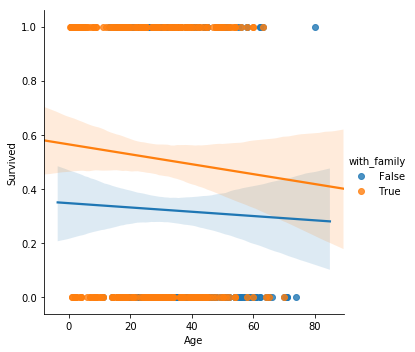

In [22]:
sns.lmplot('Age','Survived',df_titanic,hue='with_family')

## Notice that individuals who were on board the Titanic with family were somewhat more likely to have survived the Titanic, by a magnitude of about 10-20% for all ages. However, very young passengers (i.e., children) were the most likely to survive. Children with family had about a 60% chance of surving the Titanic, holding constant other factors.

## For individuals with family on board, the older an adult passenger was, the more likely he or she was to have died on the Titanic. Perhaps then, elderly adults who had family were more likely to sacrifice for their younger family members (e.g., didn't go on a rescue boat, with younger family in their stead).

## Implement scatterplot of Age vs Survived, with a hue comparing passenger class

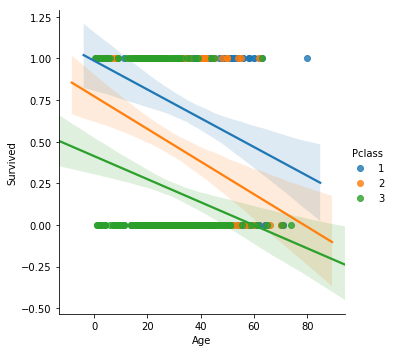

In [32]:
sns.lmplot('Age','Survived',df_titanic,hue='Pclass')

## For each given age, a higher passenger class number--reflecting a lower scioeconomic status (given pasenger tickets for passenger class 3 were less expensive than a passenger class of 2, etc.)--conistently was associated with a lower likelihood of survival. Thus, those of a higher socioeconomic status were consistently (but at differing rates at certain ages) more likely to survive the Titanic, with those in passenger class 1 about 30-50% more likely to survive the Titanic than passengers of the same age who were on board via passenger class 3.

## 3.) Implement a logistic regression model:

## Import logit model module from statsmodels, and perform data cleaning 

In [23]:
#import statsmodels library for regression models such as logistic
import statsmodels.api as sm

#Replace the empty rows of data from the Age variable with null values
#Replaces any empty cells/rows of data from the Age column with Nan (i.e., null) values
df_titanic['Age'].replace(' ',np.nan, inplace=True)

#Drop all null values from the Age column.
df_titanic['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

## Since the person column is merely a qualitative/object data variable,  this needs to be converted to binary/quantiative variables. Also, delete the original column as well, since this cannot be used for  the regression analysis:

In [24]:
#Delete the Sex column from the DataFrame, and creates TWO binary variable columns: one called 'Male', and the other called 'Female'. 
#These column titles are automatically created by pandas based on the name of the strings from the variable 
df_titanic = pd.concat([df_titanic.drop('person', axis=1), pd.get_dummies(df_titanic['person'])], axis=1)
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,with_family,child,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,True,1,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,True,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,True,1,0,0


In [26]:
## Specify the vector of covaraites, and add an intercept

X= df_titanic[['Pclass', 'SibSp', 'Parch', 'female','child']]

#add constant to the RHS of the regression model
X = sm.add_constant(X)

## Specify the outcome variable

In [27]:
#specify the column for the dependent variable
y= df_titanic['Survived']

## Specify/initialize the logit model

In [28]:
#Specify the logit model 
logit = sm.Logit(y,X)

## Finally, estimate the logit model, given the specified parameters, and print:
### a.) the logit model coefficients and intercept, &
### b.) the odds ratio for each independent variable

In [29]:
#Estimate the logit model
reg_results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.425366
         Iterations 6


## a.) Print the logistic regression results for the coefficients and intercept.

In [30]:
#Print the logistic regression results for the coefficients and intercept.
print(reg_results.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Feb 2019   Pseudo R-squ.:                  0.3612
Time:                        18:22:21   Log-Likelihood:                -379.00
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.974e-90
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7752      0.256      3.030      0.002       0.274       1.277
Pclass        -1.0608      0.116     -9.184      0.000      -1.287      -0.834
SibSp         -0.4739      0.113     -4.186      0.0

## b.) Print the odds ratio (i.e., exponentiated from the logit models' coefficients, which are in the form of log of the odds ratios)

In [31]:
print (np.exp(reg_results.params))

const      2.171060
Pclass     0.346185
SibSp      0.622548
Parch      0.784386
female    25.570078
child     37.000814
dtype: float64


## What do the logit regression model results show? 

## It appears that each of the variables are moderately to highly statistically significant; 4 of the 5 variables are in fact signficant at the 0.01 level. 


##  However, 3 of the 5 variables show a signifcant reduction in the probability that an individual would have survived the Titanic. 

## Namely, a.) being in a higher-number passenger class (the higher classes referring to cheaper fares/tickets located lowerwithin the ship), b.) having a sibling or spouse, c.) being a parent with children on board the Titanic all were associated  with lower odds of survival. Somewhat surprisingly, passenger class shows the largest magnitude. 


## On the other hand, 2 of the variables were aossciated with a significant increase in the odds of surviving the Titanic.

## For example, passengers who were either adult females or children regardless of gender. Those who were children were the most likely to survive the Titanic, with adult female passengers also having a nearly-as-high increase in the odds of their survival, relative to adult male passengers, holding constant passenger class. 

## In fact, the magnitude of the female and child variables is even higher than the passenger class, sibling/spouse on board, and parents with children variables combined, so even many children and women from the less-expesnive passenger classes were more likely to survive than adult male passengers who were on board with the most expensive passenger classes.


## In short, the results of the data suggests the prevailing claim that ships in accidents/wrecks would try to prioritize and save women and children first (adult men being the lowest on the priority list) is by and large quite true for the Titanic.
